In [163]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set()

# Análisis de una base de datos

## En el siguiente conjunto de datos, se tienen los registros de los asesinatos que se han cometido a manos de oficiales de los estados unidos entre los años 2015-2020.

# objetivos:
- Se analizará las principales relaciones entre el número de asesinatos y la etnia de las personas asesinadas.
- También se considerará dentro del análisis si de dicho número de personas pertenecientes a dichas étnicas presentaba algun signo de transtorno mental, si intetaron huir o si influyó que estuvieran armados.
- Se tratará de refutar o confirmar la teoría de que algunos de los asesinatos hacia ciertas étnias son debido a una cultura de racismo que se presenta fuertemente en estados unidos.
- Además se tratará de analizar (en caso de confirmarse el anterior punto) si ésta tendencia se ve disminuida o aumentada conforme pasan los años

In [164]:
#lo primero que realizaremos será hacer una lectura del dataset con ayuda de pandas
datos=pd.read_csv('../Datasets/shootings.csv')

In [165]:
datos

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,5916,Rayshard Brooks,2020-06-12,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices
4891,5925,Caine Van Pelt,2020-06-12,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns
4892,5918,Hannah Fizer,2020-06-13,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed
4893,5921,William Slyter,2020-06-13,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns


In [166]:
#se convierte la columna de la fecha en datos tipo 'datetime' por si se requiere obtener información específica del mes, año o día
datos['date']=pd.to_datetime(datos['date'])

In [167]:
#Se hace una revisión rápida de los datos para asegurarnos que no tenemos datos nulos
datos.info()
#Se confirma que no tenemos datos nulos y que tenemos los correctos tipos de datos que queremos para un correcto análisis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       4895 non-null   int64         
 1   name                     4895 non-null   object        
 2   date                     4895 non-null   datetime64[ns]
 3   manner_of_death          4895 non-null   object        
 4   armed                    4895 non-null   object        
 5   age                      4895 non-null   float64       
 6   gender                   4895 non-null   object        
 7   race                     4895 non-null   object        
 8   city                     4895 non-null   object        
 9   state                    4895 non-null   object        
 10  signs_of_mental_illness  4895 non-null   bool          
 11  threat_level             4895 non-null   object        
 12  flee                     4895 non-

# Gente asesinada de acuerdo a su raza
Una primera revisión a los datos será tabular y graficar un histograma de la cantidad de gente que fue disparada clasificandola por su raza.
## Hipotesis: 
dado el conocimiento popular (y quizá un poco sesgado) que se tiene sobre los asesinatos cometidos en Estados Unidos, si bien la mayoría será gente blanca, es posible que el segundo mayor grupo sea el de gente Afrodescendiente seguido de gente con razgos hispanos.

In [168]:
#Para propositos de éste análisis se tomará sólo la columna del dataset correspondiente a la raza
#posteriormente se realizará un conteo de valores únicos
datos['race'].value_counts()


White       2476
Black       1298
Hispanic     902
Asian         93
Native        78
Other         48
Name: race, dtype: int64

[Text(0.5, 1.0, 'Personas asesinadas de acuerdo a su raza')]

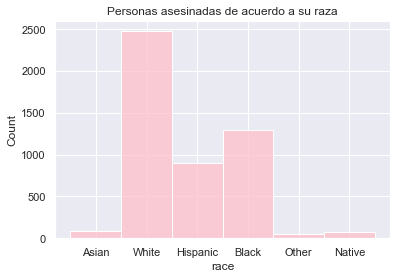

In [169]:
#para su visualización se usará un histograma
sns.histplot(data=datos,x='race',stat='count',binwidth=1,color='pink').set(title='Personas asesinadas de acuerdo a su raza')

**si bien la anterior gráfica está poco cerca de mostrar que se cometieron asesinatos debido a la raza, es un buen acercamiento a un primer análisis donde podemos observar que las hipotesis que lanzamos fueron correctas.**\
**Se muestra una proporción más grande de personas blancas asesinadas, seguido de personas negras e hispanas. Ahora estamos listos para un análisis más completo**

# Razones de los asesinatos
En ésta parte se analizará si de la gente asesinada, existieron razones que orillaron a los oficiales a tomar la decisión de disparar, quizá por estar armados, por intentar resistir el arresto o algún signo de desorden mental.
## Hipotesis:
Algunos asesinatos que fueron realizados sin causa aparente se efectuaron debido a la raza de las personas

**Se hará un primer análisis, una buena razón para disparar es suponer que el sujeto está atacando a un oficial por lo cual se separarán los datos entre los que se suponía un ataque o no**


In [170]:
#inspeccionamos los diferentes tratos que de le dieron a las personas, dependiendo de su nivel de ataque
datos.threat_level.unique()

array(['attack', 'other', 'undetermined'], dtype=object)

In [171]:
#filtramos a los que mostraron señales de ataque
ataque=datos[datos.threat_level=='attack']
ataque

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects
5,11,Kenneth Joe Brown,2015-01-04,shot,gun,18.0,M,White,Guthrie,OK,False,attack,Not fleeing,False,Guns
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4886,5911,Lewis Ruffin,2020-06-09,shot,gun,38.0,M,Black,Orlando,FL,False,attack,Other,False,Guns
4888,5914,Mason James Lira,2020-06-11,shot,gun,26.0,M,White,Paso Robles,CA,True,attack,Foot,False,Guns
4890,5916,Rayshard Brooks,2020-06-12,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices
4891,5925,Caine Van Pelt,2020-06-12,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns


In [172]:
#filtramos a los que no mostraron alguna señal de ataque
no_ataque=datos[~(datos.threat_level=='attack')]

In [173]:
no_ataque

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
8,16,Autumn Steele,2015-01-06,shot,unarmed,34.0,F,White,Burlington,IA,False,other,Not fleeing,True,Unarmed
12,22,Hashim Hanif Ibn Abdul-Rasheed,2015-01-07,shot,knife,41.0,M,Black,Columbus,OH,True,other,Not fleeing,False,Sharp objects
15,29,Loren Simpson,2015-01-08,shot,unknown,28.0,M,White,Huntley,MT,False,undetermined,Not fleeing,False,Unknown
25,48,Richard McClendon,2015-01-13,shot,knife,43.0,M,White,Jourdanton,TX,True,other,Not fleeing,False,Sharp objects
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4885,5908,Jarrid Hurst,2020-06-07,shot,knife,35.0,M,White,Industry,CA,True,other,Not fleeing,False,Sharp objects
4887,5913,Gregorio Cruz Vanloo,2020-06-11,shot,gun,28.0,M,White,DeKalb County,TN,False,other,Other,False,Guns
4889,5915,Michael Thomas,2020-06-11,shot,unknown,62.0,M,Black,Lancaster,CA,False,undetermined,Not fleeing,False,Unknown
4892,5918,Hannah Fizer,2020-06-13,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed


**Con estos datos ya filtrados, nos da curiosidad aquel clasificación de indeterminación del nivel de ataque, pues si no pudieron determinar si se encontraban a la defensiva o no, entonces interesa saber las razones por las cuales tomaron la decisión de abrir fuego**

In [174]:
ndet=no_ataque[no_ataque.threat_level=='undetermined']
ndet

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
15,29,Loren Simpson,2015-01-08,shot,unknown,28.0,M,White,Huntley,MT,False,undetermined,Not fleeing,False,Unknown
97,136,Kenneth Kreyssig,2015-02-09,shot,gun,61.0,M,White,Smyrna,ME,True,undetermined,Not fleeing,False,Guns
144,185,Ernesto Javiar Canepa Diaz,2015-02-27,shot,unarmed,27.0,M,Hispanic,Santa Ana,CA,False,undetermined,Not fleeing,False,Unarmed
164,269,Naeschylus Vinzant,2015-03-06,shot,unarmed,37.0,M,Black,Aurora,CO,False,undetermined,Foot,False,Unarmed
200,292,Roberto Leon,2015-03-17,shot,unarmed,22.0,M,Hispanic,Sacramento,CA,False,undetermined,Car,False,Unarmed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4871,5852,Israel Berry,2020-05-31,shot,unknown,49.0,M,White,Portland,OR,False,undetermined,Other,False,Unknown
4875,5867,Ryan Emblem Moore,2020-06-01,shot,unknown,36.0,M,White,Fayetteville,AR,False,undetermined,Not fleeing,False,Unknown
4881,5905,Scott Anderson Hutton,2020-06-03,shot,unknown,36.0,M,White,Alexander,AR,False,undetermined,Not fleeing,False,Unknown
4884,5900,Erik Salgado,2020-06-06,shot,unknown,22.0,M,Hispanic,Oakland,CA,False,undetermined,Not fleeing,False,Unknown


[Text(0.5, 1.0, 'asesinatos sin clasificación de ataque a un oficial')]

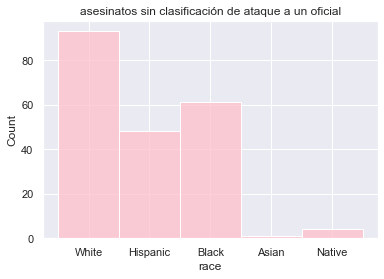

In [175]:
sns.histplot(data=ndet,x='race',binwidth=1,color='pink').set(title='asesinatos sin clasificación de ataque a un oficial')

**Donde de la misma forma, apreciamos que la cantidad de personas que fueron asesinadas sin razón aparente siguen siendo en mayor proporción la gente blanca, seguido de Afroaméricanos e Hispánicos**\
**Ahora interesa estudiar por separado cada uno de ellos para conocer si quizá las razones podrían que estuvieran armados, con signos de enfermedad mental o escapando de la policia**


In [176]:
#Filtramos los datos de la tabla de nivel de ataque no determinado por razas
W=ndet[ndet.race=='White']
H=ndet[ndet.race=='Hispanic']
B=ndet[ndet.race=='Black']
A=ndet[ndet.race=='Asian']
N=ndet[ndet.race=='Native']

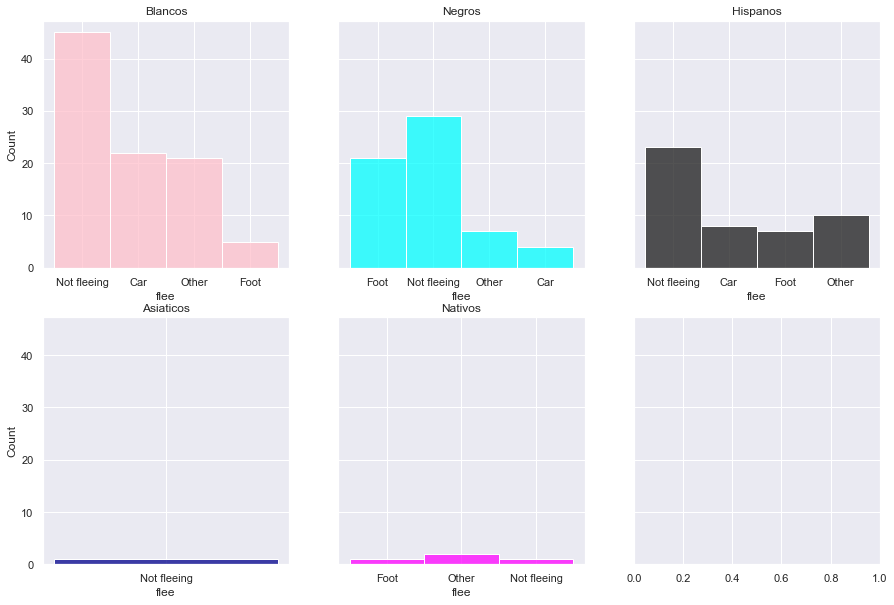

In [177]:
#Se grafican subplots por raza para la columna de flee y estudiar si escapar influyó en su toma de decisión
fig,axes=plt.subplots(2,3,sharey=True,figsize=(15,10))
sns.histplot(data=W,x='flee',color='pink',ax=axes[0,0]).set_title('Blancos')
sns.histplot(data=B,x='flee',ax=axes[0,1],color='cyan').set_title('Negros')
sns.histplot(data=H,x='flee',ax=axes[0,2],color='k').set_title('Hispanos')
sns.histplot(data=A,x='flee',ax=axes[1,0],color='darkblue').set_title('Asiaticos')
sns.histplot(data=N,x='flee',ax=axes[1,1],color='magenta').set_title('Nativos')
plt.show()


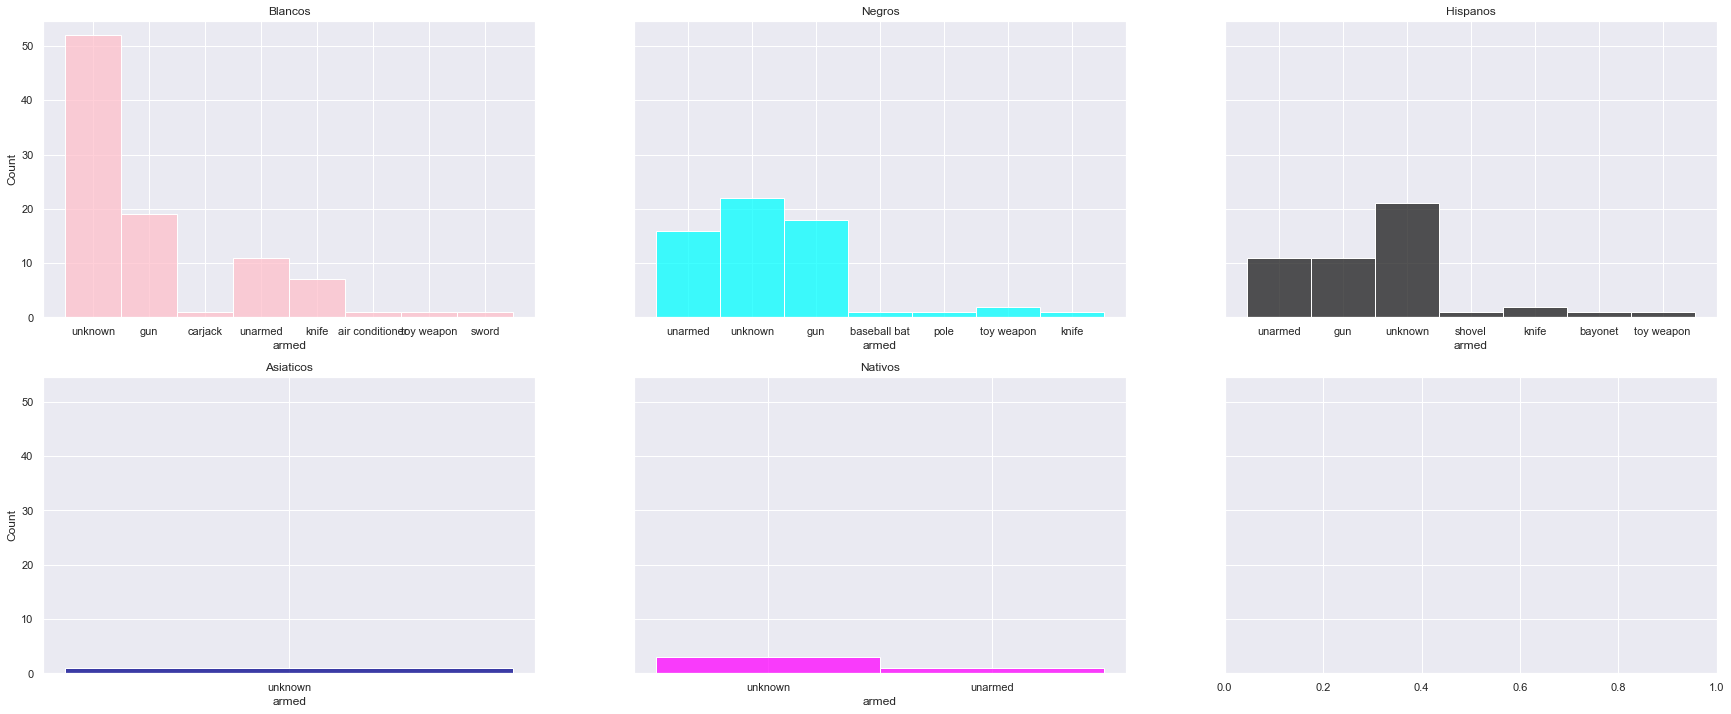

In [178]:
#Realizamos subplots por razas para la columna 'armed' y estudiar si estar armado influyó en la toma de decisión del oficial
fig,axes=plt.subplots(2,3,sharey=True,figsize=(30,12))
sns.histplot(data=W,x='armed',color='pink',ax=axes[0,0]).set_title('Blancos')
sns.histplot(data=B,x='armed',ax=axes[0,1],color='cyan').set_title('Negros')
sns.histplot(data=H,x='armed',ax=axes[0,2],color='k').set_title('Hispanos')
sns.histplot(data=A,x='armed',ax=axes[1,0],color='darkblue').set_title('Asiaticos')
sns.histplot(data=N,x='armed',ax=axes[1,1],color='magenta').set_title('Nativos')
plt.show()

In [179]:
#Creamos una función para aplicarla a la columna de signs_of_mental_illness y crear una nueva columna con variables str
#Esto con el fin de poder obtener un histograma
def e_mental(x):
    '''Función que convierte booleanos en str (si) y (no) para los valores
    True y False respectivamente
    Recibe: Booleano
    Envía: str'''
    if x:
        a='sí'
    else:
        a='no'
    return a

In [180]:
#Aplicamos nuestra función a nuestra columna de interés y creamos nuestra nueva columna 'signos_de_e_mental'
ndet['signos_de_e_mental']=ndet.signs_of_mental_illness.apply(e_mental)

C:\Users\jesus\AppData\Local\Temp\ipykernel_5184\2606145178.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndet['signos_de_e_mental']=ndet.signs_of_mental_illness.apply(e_mental)


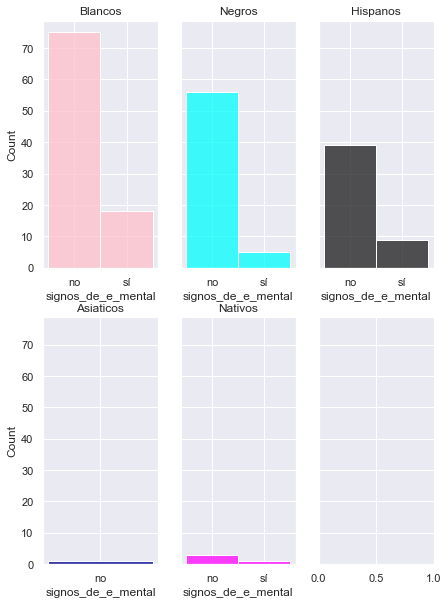

In [181]:
#Volvemos a filtrar la tabla ndet por raza con la nueva columna agregada en el paso anterior
W=ndet[ndet.race=='White']
H=ndet[ndet.race=='Hispanic']
B=ndet[ndet.race=='Black']
A=ndet[ndet.race=='Asian']
N=ndet[ndet.race=='Native']
#Se grafican subplots por raza para estudiar la columna de signos de enfermedad mental
fig,axes=plt.subplots(2,3,sharey=True,figsize=(7,10))
sns.histplot(data=W,x='signos_de_e_mental',color='pink',ax=axes[0,0]).set_title('Blancos')
sns.histplot(data=B,x='signos_de_e_mental',ax=axes[0,1],color='cyan').set_title('Negros')
sns.histplot(data=H,x='signos_de_e_mental',ax=axes[0,2],color='k').set_title('Hispanos')
sns.histplot(data=A,x='signos_de_e_mental',ax=axes[1,0],color='darkblue').set_title('Asiaticos')
sns.histplot(data=N,x='signos_de_e_mental',ax=axes[1,1],color='magenta').set_title('Nativos')
plt.show()

## observaciones de los casos con razón determinada por nivel de ataque 'no especificado'
Un par de cosas por observar son las siguientes:
1. Los signos de enfermedad mental no son un gran indicativo al momento en que los oficiales decidieron disparar a las personas en general, pues en su mayoría no se presentaban estos signos para ninguna raza.
2. Para el caso de estar armados, las personas blancas se observa que no se tenía conocimiento del arma que poseía, sin embargo debido a las sospechas pudieron arremeter contra ellos. Por otro lado, para el caso de negros e hispanos se observa que la diferencia entre estar desarmado, armado o bajo sospechas de arma son muy pequeñas, de hecho para el caso de la gentre Afroaméricana se tiene prácticamente la misma proporción para los 3 casos.
3. En el caso de estar escapando, en su mayoria no se encontraban escapando para ninguna de las 3 razas, por lo cual podemos inferir que quizá esta no fue una de las razones probables por las cuales los oficiales dispararon.
4. Adicional a lo anterior, vemos que el número de incidentes con Asiaticos y Nativos es muy pequeño en comparación con las otras 3 razas, por lo cual podemos decir que son los que menos incidentes tienen con la policia.

**En conclusión se puede decir que en su mayoria la razón más probable para que los oficiales dispararan fue por sospecha de arma, sin embargo se observa que para el caso de la gente Afroamericana la proporción de sospecha de arma, desarmado y armado, es la misma, por lo cual se puede inferir que quizá las razones podrían tratarse más por la raza que por una razón aparente**

## Incidentes por estado
En este caso analizaremos en que estados se presentan mayor incidencia de asesinatos a manos de oficiales para analizar a su vez, la proporcíón que hay de incidentes por raza

In [184]:
#Obtenemos los valores únicos a la vez que el número de incidentes por estado
datos.state.value_counts()

CA    701
TX    426
FL    324
AZ    222
CO    168
GA    161
OK    151
NC    148
OH    146
WA    126
TN    125
MO    124
LA    102
IL     99
PA     95
AL     95
NM     93
VA     92
IN     91
NY     90
WI     88
KY     87
NV     85
SC     80
MD     77
OR     76
AR     73
MI     71
MS     61
NJ     60
MN     60
UT     58
KS     49
WV     46
ID     37
AK     36
MA     33
IA     31
MT     29
HI     29
NE     24
ME     21
CT     20
SD     14
DC     13
WY     13
NH     12
ND     11
DE     10
VT      8
RI      4
Name: state, dtype: int64

**Para evitar analizar los 50 estados, nos enfocaremos solo en los 2 con más incidentes, que en este caso son el estado de california y texas**

In [185]:
#filtramos los datos de los dos estados
texas=datos[datos.state=='TX']
California=datos[datos.state=='CA']

Text(0.5, 1.0, 'Incidentes Texas')

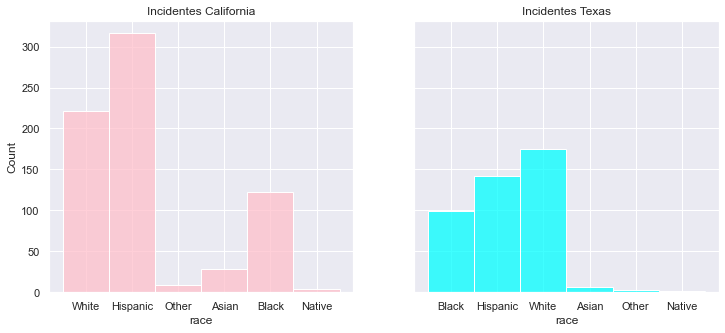

In [191]:
#se analiza de manera idividual el número de gente asesinada clasificada por raza por estado
fig,axes=plt.subplots(1,2,sharey=True,figsize=(12,5))
sns.histplot(data=California,x='race',color='pink',ax=axes[0]).set_title('Incidentes California')
sns.histplot(data=texas,x='race',ax=axes[1],color='cyan').set_title('Incidentes Texas')

**Observamos que en el estado de california se observa un mayor número de incidentes con gente Hispana, era de esperarse pues es uno de los estados que recibe mayor número de inmigrantes hispanos, sin embargo, habría que ver las razones por las cuales ocurrieron estos incidentes para determinar si es debido a la población alta o por cuestiones de racismo**

## Indice de incidentes por año
Para finalizar, se observará mediante algunos gráficos, como es que el número de incidentes ah aumentado o disminuido por raza en todo el pais.

In [192]:
#Para esto volvemos a filtrar el data set por raza pero ahora en la tabla general
W=datos[datos.race=='White']
H=datos[datos.race=='Hispanic']
B=datos[datos.race=='Black']
A=datos[datos.race=='Asian']
N=datos[datos.race=='Native']

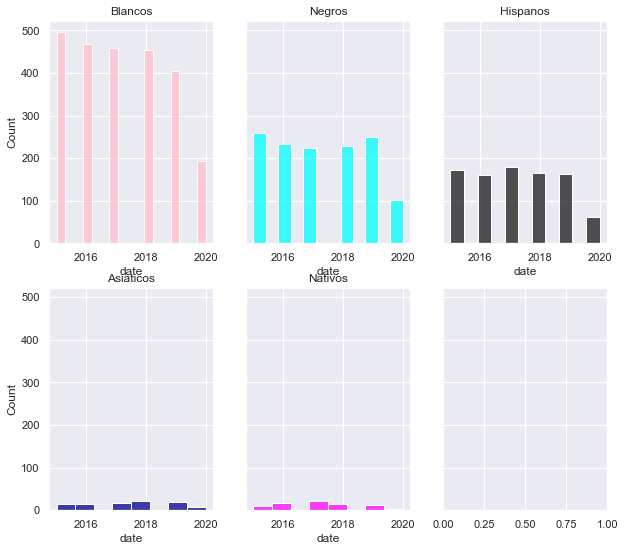

In [196]:
#finalmente se hacen subplots para ver la tendencia por año
fig,axes=plt.subplots(2,3,sharey=True,figsize=(10,9))
sns.histplot(data=W,x=W['date'].dt.year,color='pink',ax=axes[0,0]).set_title('Blancos')
sns.histplot(data=B,x=B['date'].dt.year,ax=axes[0,1],color='cyan').set_title('Negros')
sns.histplot(data=H,x=H['date'].dt.year,ax=axes[0,2],color='k').set_title('Hispanos')
sns.histplot(data=A,x=A['date'].dt.year,ax=axes[1,0],color='darkblue').set_title('Asiaticos')
sns.histplot(data=N,x=N['date'].dt.year,ax=axes[1,1],color='magenta').set_title('Nativos')
plt.show()

**Finalmente observamos una tendencia a disminuir para el caso de blancos y negros, sin embargo vemos un comportamiento casi constante al rededor de las razas hispanas, asiáticas y nativas, adicional a esto se ve una caida abrupta de incidentes entre el año 2019 y 2020**\
**Observando la tabla de datos, podemos ver que la última fecha de registro es en el 15 de Junio de 2020, recordemos que en esas fechas el mundo estaba pasando por la reciente pandemia de COVID-19 por lo que intuyo que esa disminución abrupta de incidentes se debió a un menor fluyo de gente**